<a href="https://colab.research.google.com/github/sahriahs/tugas-citra/blob/master/klasifikasi_kualitas_buah_apel_dengan_k_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modul


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np #Operasi array
import pandas as pd #Memanipulasi data tabular

from skimage.transform import resize #Resize gambar
from skimage.io import imread #Membaca gambar

import cv2

from shutil import copyfile #Menyalin file

import matplotlib.pyplot as plt #Visualisasi

from sklearn.metrics import classification_report, accuracy_score #Evaluasi model
from sklearn.neighbors import KNeighborsClassifier #KNN classifier
from sklearn.model_selection import train_test_split #Split data

import os # Berinteraksi dengan sistem file


In [4]:
!pip install kaggle

In [7]:
!kaggle datasets download -d nurfdillah12/fruitsapel

Dataset URL: https://www.kaggle.com/datasets/nurfdillah12/fruitsapel
License(s): CC-BY-SA-4.0
 79% 33.0M/41.7M [00:01<00:00, 31.3MB/s]
100% 41.7M/41.7M [00:01<00:00, 37.7MB/s]


In [8]:
!unzip fruitsapel.zip

Archive:  fruitsapel.zip
  inflating: dataApel/Busuk/busuk  (1).png  
  inflating: dataApel/Busuk/busuk  (10).png  
  inflating: dataApel/Busuk/busuk  (100).png  
  inflating: dataApel/Busuk/busuk  (101).png  
  inflating: dataApel/Busuk/busuk  (102).png  
  inflating: dataApel/Busuk/busuk  (103).png  
  inflating: dataApel/Busuk/busuk  (104).png  
  inflating: dataApel/Busuk/busuk  (105).png  
  inflating: dataApel/Busuk/busuk  (106).png  
  inflating: dataApel/Busuk/busuk  (107).png  
  inflating: dataApel/Busuk/busuk  (108).png  
  inflating: dataApel/Busuk/busuk  (109).png  
  inflating: dataApel/Busuk/busuk  (11).png  
  inflating: dataApel/Busuk/busuk  (110).png  
  inflating: dataApel/Busuk/busuk  (111).png  
  inflating: dataApel/Busuk/busuk  (112).png  
  inflating: dataApel/Busuk/busuk  (113).png  
  inflating: dataApel/Busuk/busuk  (114).png  
  inflating: dataApel/Busuk/busuk  (115).png  
  inflating: dataApel/Busuk/busuk  (116).png  
  inflating: dataApel/Busuk/busuk  (117

In [11]:
#Path dataset
data_dir = 'dataApel'
categories = ['Busuk', 'Segar']  # Kategori apel

# List untuk data dan target
image_data = []
labels = []

In [12]:
# Load gambar dari setiap kategori
for label in categories:
    category_path = os.path.join(data_dir, label)
    print(f'Loading kategori: {label}')

    for img_name in os.listdir(category_path):
        img = imread(os.path.join(category_path, img_name))
        img_resized = resize(img, (150, 150, 3))

        # Ubah gambar palet jika perlu
        if img_resized.shape[2] == 1:
            img_resized = np.concatenate([img_resized] * 3, axis=-1)

        image_data.append(img_resized.flatten())
        labels.append(categories.index(label))
    print(f'{label} selesai dimuat')

Loading kategori: Busuk
Busuk selesai dimuat
Loading kategori: Segar
Segar selesai dimuat


In [13]:
# Konversi data menjadi numpy array
X = np.array(image_data)
y = np.array(labels)

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [15]:
# Tampilkan ukuran set pelatihan dan pengujian
print(f"Data training: {len(X_train)}, Data testing: {len(X_test)}")

Data training: 320, Data testing: 80


In [16]:
# Pipeline model dengan scaling dan KNN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [17]:
# Evaluasi model
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"Train accuracy: {train_acc:.2%}, Test accuracy: {test_acc:.2%}")

# Prediksi pada set pengujian
y_pred = model.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100}%")
print(classification_report(y_test, y_pred, target_names=categories))

# # Visualisasi hasil prediksi
# random_idx = np.random.choice(len(X_test), size=5, replace=False)
# plt.figure(figsize=(15, 5))

# for i, idx in enumerate(random_idx):
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(X_test[idx].reshape(150, 150, 3))
#     plt.title(f'Prediksi: {categories[y_pred[idx]]}')
#     plt.axis('off')

# plt.show()

Train accuracy: 94.38%, Test accuracy: 93.75%
Akurasi: 93.75%
              precision    recall  f1-score   support

       Busuk       0.91      0.98      0.94        41
       Segar       0.97      0.90      0.93        39

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [18]:
# # List dari image testing
# image_paths = [
#     '/kaggle/input/dataset/1.jpeg',
#     '/kaggle/input/dataset/2.jpg',
#     '/kaggle/input/dataset/3.jpg',
#     '/kaggle/input/dataset/4.jpeg',
#     '/kaggle/input/dataset/5.jpeg',
#     '/kaggle/input/dataset/6.jpeg',
#     '/kaggle/input/dataset/7.jpeg'
# ]

# # Fungsi untuk prediksi dan menampilkan gambar
# def predict_images(paths):
#     for img_path in paths:
#         img = imread(img_path)
#         plt.imshow(img)
#         plt.show()

#         # mengubah ukuran
#         img_resized = resize(img, (150, 150, 3))
#         prediction = model.predict([img_resized.flatten()])[0]

#         print(f"Hasil Identifikasi Gambar: {categories[prediction]}\n")

# predict_images(image_paths)


Hasil Identifikasi busuk  (141).png: Segar
Hasil Identifikasi busuk  (176).png: Busuk
Hasil Identifikasi 1 (147).jpg: Segar
Hasil Identifikasi busuk  (93).png: Busuk
Hasil Identifikasi 1 (147).png: Segar


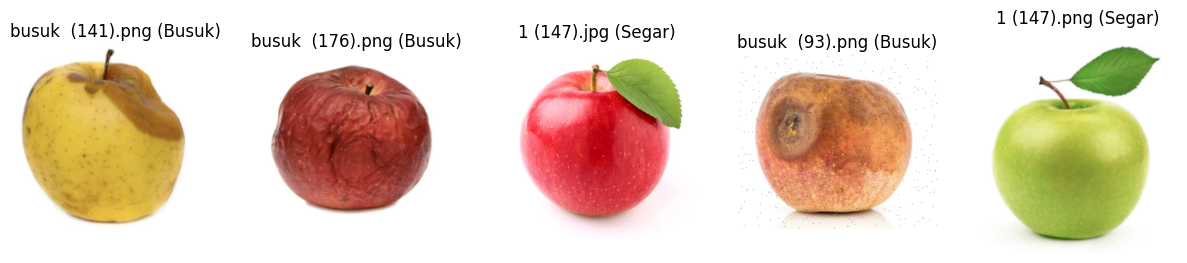

In [19]:
# Fungsi untuk memilih gambar acak dari kategori
def pilih_gambar_acak(jumlah):
    hasil = []
    for _ in range(jumlah):
        kategori = np.random.choice(categories)
        folder_kategori = os.path.join(data_dir, kategori)
        gambar = np.random.choice(os.listdir(folder_kategori))
        img_path = os.path.join(folder_kategori, gambar)
        hasil.append((img_path, gambar, kategori))
    return hasil

# Pilih 5 gambar acak dan prediksi
gambar_acak = pilih_gambar_acak(5)
plt.figure(figsize=(15, 8))

for i, (img_path, img_name, kategori) in enumerate(gambar_acak):
    img = imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{img_name} ({kategori})')
    plt.axis('off')

    img_resized = resize(img, (150, 150, 3))
    prediksi = model.predict([img_resized.flatten()])[0]
    print(f"Hasil Identifikasi {img_name}: {categories[prediksi]}")

plt.show()